In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import cv2

In [2]:
x_train = []
x_val = []
y_train = []
y_val = []

# Healthy data set....................................................

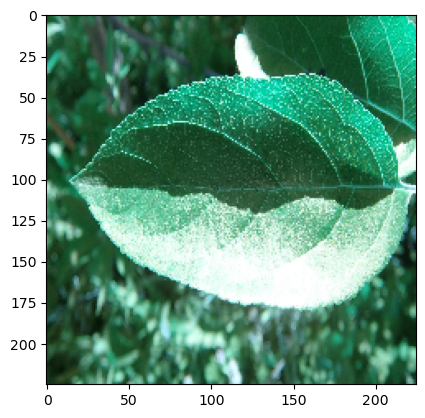

In [3]:
for i in os.listdir("Dataset/Train/Healthy/"):
    img = cv2.imread("Dataset/Train/Healthy/"+i,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(225, 225))
    x_train.append(img)
    y_train.append(0)
    
    
    
for i in os.listdir("Dataset/Validation/Healthy/"):
    img = cv2.imread("Dataset/Validation/Healthy/"+i,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(225, 225))
    x_val.append(img)
    y_val.append(0)
    
    
    
plt.imshow(x_train[2])
plt.show()

# Rust data set.......................................................

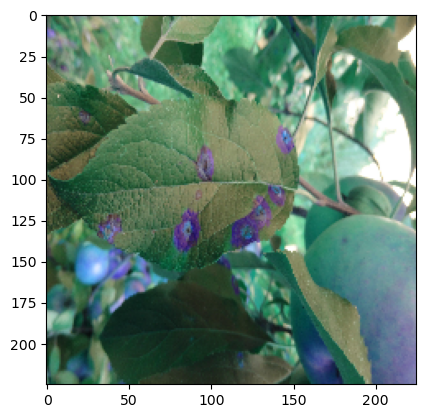

In [4]:
for i in os.listdir("Dataset/Train/Rust/"):
    img = cv2.imread("Dataset/Train/Rust/"+i,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(225, 225))
    x_train.append(img)
    y_train.append(1)
    
    
    
for i in os.listdir("Dataset/Validation/Rust/"):
    img = cv2.imread("Dataset/Validation/Rust/"+i,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(225, 225))
    x_val.append(img)
    y_val.append(1)
    
    
    
plt.imshow(x_train[600])
plt.show()

# Powdery data set...........................................

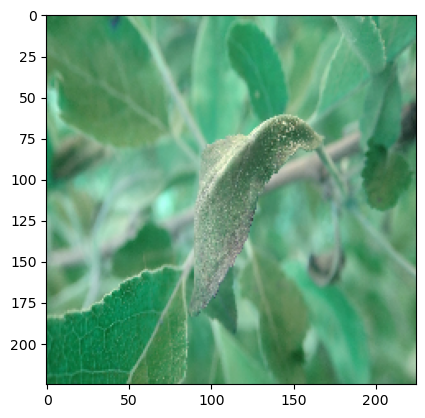

In [5]:
for i in os.listdir("Dataset/Train/Powdery/"):
    img = cv2.imread("Dataset/Train/Powdery/"+i,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(225, 225))
    x_train.append(img)
    y_train.append(2)
    
    
    
for i in os.listdir("Dataset/Validation/Powdery/"):
    img = cv2.imread("Dataset/Validation/Powdery/"+i,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(225, 225))
    x_val.append(img)
    y_val.append(2)
    
    
    
plt.imshow(x_train[1100])
plt.show()

# Preprocessing Of Data

In [6]:
#Convert np.array from list of Image
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
print("Shape of Training IMG : ",x_train.shape)
print("Shape of Training Target :",y_train.shape)
print("Shape of Validation IMG : ",x_val.shape)
print("Shape of Validation Target :",y_val.shape)

#Changing the Range from 0-255 to 0-1
x_train = x_train/255
x_val = x_val/255

#Categorizing the target 
from keras.utils import to_categorical
print("Total Number of Class : ",np.unique(y_val))
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
print("Shape of Training Target after converting it into categorical : ",y_train.shape)
print("Shape of Validation Target after converting it into categorical : ",y_val.shape)

#Mixing The Data
from sklearn.model_selection import train_test_split
x_train,_,y_train,_ = train_test_split(x_train,y_train,test_size=0.000000000000000000000000000000000000001,random_state=30)
x_val,_,y_val,_ = train_test_split(x_val,y_val,test_size=0.000000000000000000000000000000000000001,random_state=30)

print("Final shapes......................................")
print("Shape of Training IMG : ",x_train.shape)
print("Shape of Training Target :",y_train.shape)
print("Shape of Validation IMG : ",x_val.shape)
print("Shape of Validation Target :",y_val.shape)

Shape of Training IMG :  (1322, 225, 225, 3)
Shape of Training Target : (1322,)
Shape of Validation IMG :  (60, 225, 225, 3)
Shape of Validation Target : (60,)
Total Number of Class :  [0 1 2]
Shape of Training Target after converting it into categorical :  (1322, 3)
Shape of Validation Target after converting it into categorical :  (60, 3)
Final shapes......................................
Shape of Training IMG :  (1321, 225, 225, 3)
Shape of Training Target : (1321, 3)
Shape of Validation IMG :  (59, 225, 225, 3)
Shape of Validation Target : (59, 3)


# Model Initializing

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the Taining data with Validation Data

In [8]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val), validation_batch_size=16)

Epoch 1/5
42/42 [==============================] - 13s 304ms/step - loss: 1.8964 - accuracy: 0.4686 - val_loss: 0.6739 - val_accuracy: 0.7627
Epoch 2/5
42/42 [==============================] - 13s 306ms/step - loss: 0.4417 - accuracy: 0.8319 - val_loss: 0.4953 - val_accuracy: 0.8136
Epoch 3/5
42/42 [==============================] - 13s 314ms/step - loss: 0.2273 - accuracy: 0.9243 - val_loss: 0.3464 - val_accuracy: 0.8305
Epoch 4/5
42/42 [==============================] - 13s 316ms/step - loss: 0.1144 - accuracy: 0.9697 - val_loss: 0.2686 - val_accuracy: 0.8983
Epoch 5/5
42/42 [==============================] - 13s 303ms/step - loss: 0.1016 - accuracy: 0.9637 - val_loss: 0.3583 - val_accuracy: 0.9153


<Axes: >

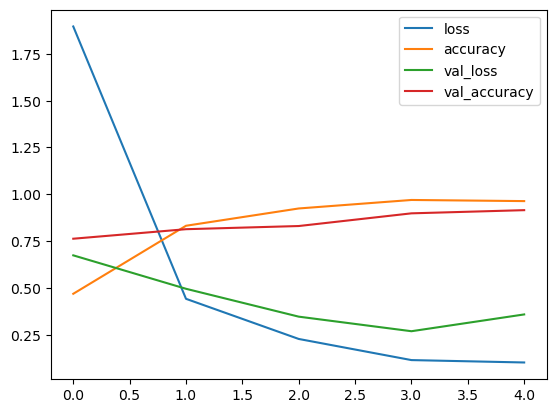

In [9]:
lossPlot = pd.DataFrame(model.history.history)
lossPlot.plot()

# Prepareing data for testing.......................

In [10]:
x_test = []
y_test = []
for i in os.listdir("Dataset/Test/Healthy/"):
    img = cv2.imread("Dataset/Test/Healthy/"+i,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(225, 225))
    x_test.append(img)
    y_test.append(0)
for i in os.listdir("Dataset/Test/Rust/"):
    img = cv2.imread("Dataset/Test/Rust/"+i,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(225, 225))
    x_test.append(img)
    y_test.append(1)
for i in os.listdir("Dataset/Test/Powdery/"):
    img = cv2.imread("Dataset/Test/Powdery/"+i,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(225, 225))
    x_test.append(img)
    y_test.append(2)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = x_test/255.
y_test = to_categorical(y_test)

In [11]:
y_pred = np.round(model.predict(x_test))
y_pred.shape

5/5 [==============================] - 0s 72ms/step


(150, 3)

# Performence Matrix..............

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        58
           1       0.86      0.96      0.91        45
           2       0.88      0.98      0.93        45

   micro avg       0.90      0.91      0.91       148
   macro avg       0.90      0.92      0.91       148
weighted avg       0.91      0.91      0.91       148
 samples avg       0.90      0.90      0.90       148



C:\Users\IPG3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Saving the model with pickel

In [22]:
import tensorflow as tf
m = tf.keras.models.load_model("model_directory")